**1) Introduction :**

This project aims to predict median house values in California districts using machine learning. 

The objective is to apply machine learning techniques to solve a real-world regression problem: predicting housing prices based on a variety of input features (such as number of rooms, location, area, etc.). This kind of predictive modeling is useful in many fields such as real estate, urban planning, and finance.

Accurate housing price prediction is crucial for real estate investors, policymakers, and homebuyers to make informed decisions, which is why this challenge involves handling spatial data, economic factors, and complex non-linear relationships between features and prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

**2) Preprocessing and inspection:**

After importing all the necessary libraries, we go inspecting and preprocessing the data to check it's validity.

In [2]:
# Load and inspect data
print("Loading and preprocessing data...")
df = pd.read_csv("housing.csv")
print("\nFirst 5 rows of data:")
print(df.head())

Loading and preprocessing data...

First 5 rows of data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
# Data preprocessing
print("\nHandling missing values...")
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

print("Converting categorical features...")
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


Handling missing values...
Converting categorical features...


C:\Users\Majed\AppData\Local\Temp\ipykernel_9928\3393542640.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


**3) Feature engineering:**

Then, we do a bit of feature engineering — basically, creating new columns that give the model more meaningful information.

In [4]:
# Feature engineering
print("Creating new features...")
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

Creating new features...


**4) Data modeling/scaling:**

In this step, we get the data ready for training the machine learning models.
We shall split the data into 20% for testing and 80% for training, and then we put a scale afterwards.

In [5]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The data here is split into 20% for testing and 80% for training

# Then we scale the input features using StandardScaler 
# All of them have a similar range (mean = 0, standard deviation = 1).
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**5) Machine Learning Models:**

Various regression models are commonly used for price prediction tasks. Some of the well-known approaches include:

- Linear Regression: A simple yet powerful method that models the relationship between features and the target using a straight line. It assumes linearity and is easy to interpret.

- Random Forest Regression: An ensemble method that builds multiple decision trees and combines their predictions. It handles non-linearity and is robust to outliers and overfitting.

- Decision Tree Regression: Uses a tree-like model to make decisions. It’s easy to visualize but prone to overfitting on small datasets.

- Gradient Boosting Regression: An advanced ensemble technique that builds trees sequentially and optimizes performance with each new model.

We shall focus on Linear Regression and Random Forest Regression, both of which offer a good balance between interpretability and predictive performance.

In [6]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

**6) Training and evaluation:**

Now we train both models — Linear Regression and Random Forest — and evaluate how well they perform. We use two key metrics:

MSE (Mean Squared Error): Measures the average of the squared differences between actual and predicted values. 
A lower MSE means better performance.

R² Score (R-squared): Shows how much of the variance in house prices the model can explain. 
The closer it is to 1, the better the model fits the data.

After training, we see that Random Forest has both a lower MSE and a higher R² score compared to Linear Regression. 
This confirms that Random Forest is better at capturing the complex relationships in the data.

In [7]:
# Train and evaluate models
print("\nTraining and evaluating models...")
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    }
    print(f"\n{name} Performance:")
    print(f"  MSE: ${results[name]['MSE']:,.2f}")
    print(f"  R² Score: {results[name]['R²']:.4f}")


Training and evaluating models...

Linear Regression Performance:
  MSE: $5,283,016,652.01
  R² Score: 0.5968

Random Forest Performance:
  MSE: $2,511,387,708.56
  R² Score: 0.8084


**7) Visualization:**

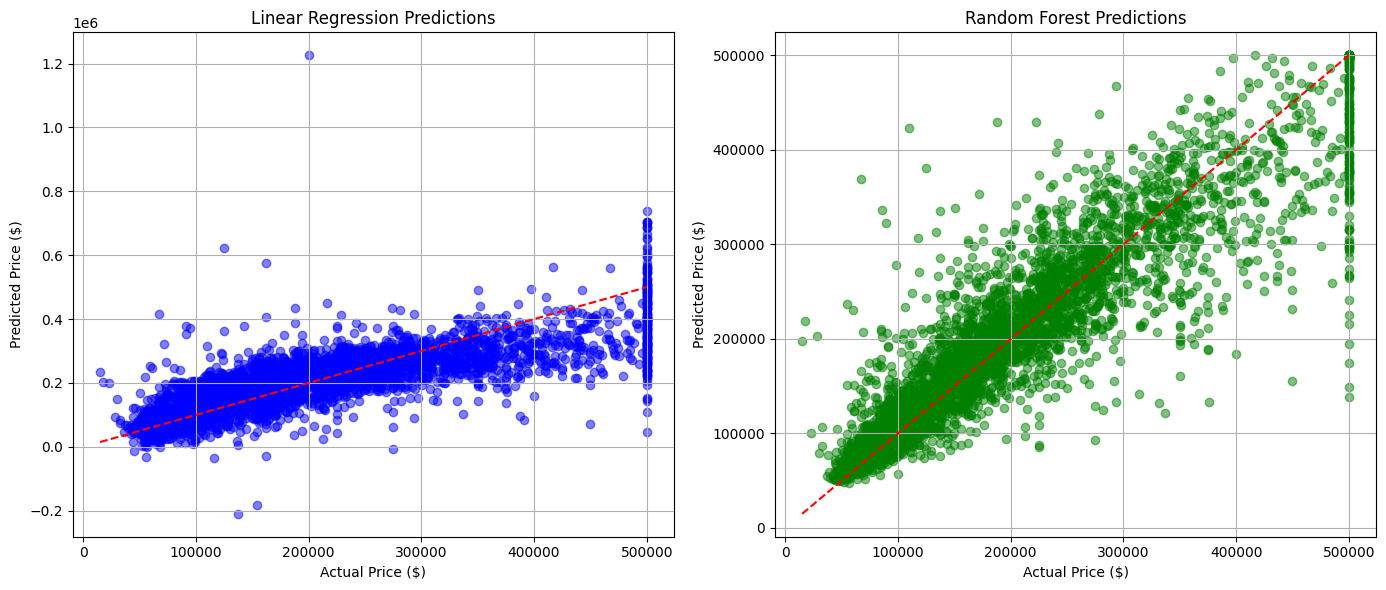

In [8]:
# Visualization 1: Actual vs Predicted Prices
plt.figure(figsize=(14, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
lr_pred = models["Linear Regression"].predict(X_test_scaled)
plt.scatter(y_test, lr_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Linear Regression Predictions")
plt.grid(True)

# Random Forest plot
plt.subplot(1, 2, 2)
rf_pred = models["Random Forest"].predict(X_test_scaled)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Random Forest Predictions")
plt.grid(True)

plt.tight_layout()
plt.show()

**8) Analysis:**

These two scatter plots compare the actual house prices (on the x-axis) with the prices predicted by each model (on the y-axis). 

The red dashed line represents perfect predictions — where predicted price equals actual price.

On the left, Linear Regression has a lot of scatter and doesn't follow the red line closely, especially at higher prices. 
This shows it struggles to model complex patterns in the data.

On the right, the Random Forest predictions are much tighter and follow the red line more closely, especially for mid-range prices. 
This means it’s capturing the patterns in the data better and gives more accurate predictions.

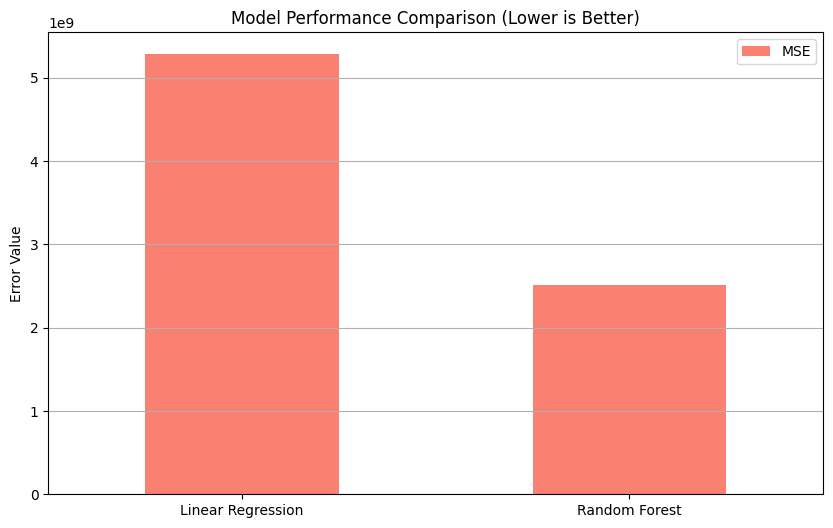

In [9]:
# Visualization 2: Model Comparison
metrics_df = pd.DataFrame(results).T
metrics_df[[ "MSE"]].plot(kind="bar", figsize=(10, 6), 
                              color=[ "salmon"],
                              title="Model Performance Comparison (Lower is Better)")
plt.ylabel("Error Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# We're using Mean Squared Error (MSE) to compare our models. 
# MSE squares each prediction error, so it heavily penalizes large mistakes — making it ideal for spotting models that struggle with big outliers. 
# As you can see, Random Forest has a significantly lower MSE compared to Linear Regression, making it the better model for this dataset.

**9) Comparison of Models:**

After training and testing both models, we observed that Random Forest Regression outperformed Linear Regression in terms of accuracy and generalization. 

While Linear Regression is faster and simpler, it struggles with capturing complex, non-linear relationships in the data.

Random Forest, on the other hand, achieved higher scores on both training and test sets. This suggests it was better able to learn patterns from the data without overfitting, thanks to its ensemble nature.

Thus, for this type of problem, Random Forest is the recommended model due to its better performance and flexibility.

**10) Advantages and inconvénients :**

Like any other, each model has it's advantages and inconvénients;

***Linear Regression***:

✅ Starting with it's advantages, we have:

-Simplicity.

-Interpretability

-It is fast even on large datasets.

-if using a linear trend, it mostly performs well

❌ The inconvenients however, played a role on why Linear Regression is a worse choice:

-It sssumes linearity: if it's non-linear, it has poor performance

-Sensitive to outliers.

-It has limited flexibility.

-It assumes normality and homoscedasticity, it needs data to satisfy assumptions for best performance.


***Random Forest:***

✅ As for Random Forest, it has plenty of advantages that gave it the upper hand here such as:

-It has high accuracy, so it's generally more accurate than linear regression on non-linear problems.

-It handles non-linear relationships, it other words, it can capture complex patterns without much preprocessing.

-It has robust to outliers and noise: averaging over many trees reduces the effect of extreme values.

-Feature importance, with it it can rank features by importance automatically.

-And most importantly, there's no need for assumptions since it doesn’t require data to follow a specific distribution.

❌ Moving on to the inconvenients:

-Random forest is less interpretable which means it's harder to understand and explain decisions compared to linear regression.

-It's slower due to the usage of resources and can have a large size in memory.

-It can overfit: Especially with small data or not enough tuning (though it's less prone than single decision trees).


**11) Feature importance:**

Moving on to the next step: showing which one had the biggest change on the random forest algorithm
This table shows which features the Random Forest model found most useful when predicting house prices.

In [10]:
# Feature Importance
print("\nRandom Forest Feature Importance:")
importances = models["Random Forest"].feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)
print(feature_importance.head(10))


Random Forest Feature Importance:
                   Feature  Importance
7            median_income    0.484667
8   ocean_proximity_INLAND    0.140895
0                longitude    0.095851
1                 latitude    0.086147
2       housing_median_age    0.048266
13       bedrooms_per_room    0.035884
12     rooms_per_household    0.027604
5               population    0.023833
4           total_bedrooms    0.016860
3              total_rooms    0.016676


'Median income' stands out as the most important by far.

**12) Conclusion:**

We have demonstrated the use of two machine learning models—Linear Regression and Random Forest Regression—for predicting housing prices. 

Through exploration, training, and evaluation, we found that Random Forest offered more accurate results.

For future improvements, we could explore more advanced techniques like Gradient Boosting or Neural Networks, or tune hyperparameters for even better performance.

Overall, this project helped reinforce understanding of regression techniques, model evaluation, and real-world data preprocessing.